In [73]:
import pandas as pd
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
from urllib import parse
from collections import Counter
warnings.filterwarnings("ignore")
plt.rc('font', family='Malgun Gothic')
%matplotlib inline

In [74]:
#10월 09일 ~ 10월 10일

In [75]:
wordCnt = pd.read_csv('fianl1010.csv') 

In [76]:
wordCnt

,url,검색어
0,h-lecture/,listening power
1,h-vod/,listening power
2,h-lecture/,한국사
3,h-vod/,한국사
4,cmp/main-relate/,listening power
...,...,...
223850,cmp/ark-pms/,문제출
223851,cmp/ark-pms/,문제출려
223852,cmp/ark-pms/,문제출력
223853,h-lecture/,국어


In [77]:
#붙어있는 데이터 삭제 (붙어 있는 데이터는 검색1회로 처리하기 위해)

words = [wordCnt["검색어"][0]]

for i in range(1,len(wordCnt)):
    if words[-1] == wordCnt["검색어"][i]:
        continue
    else:
        words.append(wordCnt["검색어"][i])

In [78]:
#10월 09일 ~ 10월 10일 검색 빈도수 순위

cnt = Counter(words)
result = dict(cnt)
rank = sorted(result.items(),reverse=True,key=lambda item: item[1])
for i in range(100): #100위 까지만 확인
    print(i+1,"위: ",rank[i])

1 위:  ('수능특강', 800)
2 위:  ('한국사', 692)
3 위:  ('과학', 636)
4 위:  ('수학', 626)
5 위:  ('정승제', 622)
6 위:  ('영어', 567)
7 위:  ('ㅇ', 522)
8 위:  ('뉴런', 503)
9 위:  ('ㄱ', 462)
10 위:  ('4회 수건빙고', 445)
11 위:  ('6회 철인 삼종 그래프', 442)
12 위:  ('국어', 429)
13 위:  ('ㅈ', 423)
14 위:  ('수능완성', 406)
15 위:  ('역사', 402)
16 위:  ('중', 399)
17 위:  ('왕초보영어', 374)
18 위:  ('ㅅ', 366)
19 위:  ('올림포스', 347)
20 위:  ('모의고사', 345)
21 위:  ('추천검색어', 344)
22 위:  ('주', 326)
23 위:  ('세계사', 324)
24 위:  ('여', 293)
25 위:  ('만점왕', 284)
26 위:  ('독서', 274)
27 위:  ('지구과학', 270)
28 위:  ('화학', 256)
29 위:  ('정승익', 253)
30 위:  ('사회', 249)
31 위:  ('중학', 247)
32 위:  ('1회 골라골라 곱셈왕', 247)
33 위:  ('너에게 가장 듣고 싶은 말', 246)
34 위:  ('생명과학', 244)
35 위:  ('14회 접시로 나눗셈', 241)
36 위:  ('뉴', 239)
37 위:  ('통합과학', 237)
38 위:  ('최태성', 232)
39 위:  ('영어듣기', 231)
40 위:  ('6회 펜토미노가 심쿵해', 227)
41 위:  ('스마트폰 대신에 깨끗한 물!', 224)
42 위:  ('주혜연', 219)
43 위:  ('ㅁ', 219)
44 위:  ('ㄴ', 217)
45 위:  ('고', 214)
46 위:  ('수', 213)
47 위:  ('카타미노(중급)', 206)
48 위:  ('통합사회', 206)
49 위

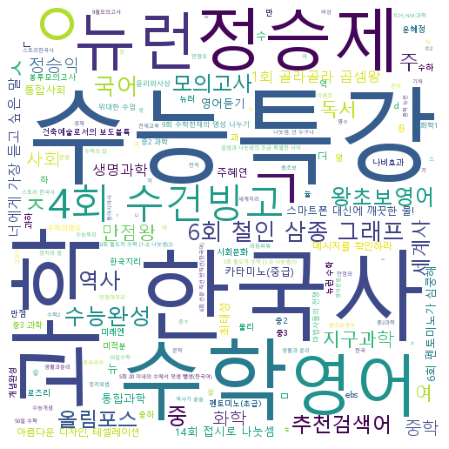

In [79]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white', width=500, height=500).generate_from_frequencies(result)

plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

In [80]:
#50위권내 오타나는 단어 찾아보기 (오타 : ㅇ, ㄱ, ㅈ, ㅅ, ㅁ, ㄴ )

typo = wordCnt.index[(wordCnt['검색어'] == 'ㅇ') | 
                     (wordCnt['검색어'] == 'ㄱ') |
                     (wordCnt['검색어'] == 'ㅈ') |
                     (wordCnt['검색어'] == 'ㅅ') |
                     (wordCnt['검색어'] == 'ㅁ') |
                     (wordCnt['검색어'] == 'ㄴ')].tolist() #인덱스 뽑기

for i in range(len(typo)): #일반적으로 오타뒤에 원래 원하는 값(인덱스 +1)을 입력할 확률이 높으므로 뒤에 검색한 내용을 찾기
    typo[i] = typo[i]+1

In [81]:
typoKeyword = wordCnt.loc[typo]["검색어"]

typoKeyword = Counter(typoKeyword)
result = dict(typoKeyword)
rank = sorted(result.items(),reverse=True,key=lambda item: item[1])
for i in range(50): #50위 까지만 확인
    print(i+1,"위: ",rank[i])

1 위:  ('주', 49)
2 위:  ('고', 47)
3 위:  ('뉴', 43)
4 위:  ('수', 43)
5 위:  ('여', 43)
6 위:  ('중', 26)
7 위:  ('ㅈ', 24)
8 위:  ('ㄱ', 23)
9 위:  ('스', 23)
10 위:  ('과', 22)
11 위:  ('저', 21)
12 위:  ('만', 20)
13 위:  ('마', 20)
14 위:  ('구', 20)
15 위:  ('즈', 19)
16 위:  ('ㅁ', 18)
17 위:  ('기', 17)
18 위:  ('이', 16)
19 위:  ('ㅅ', 16)
20 위:  ('어', 15)
21 위:  ('정승제', 14)
22 위:  ('그', 14)
23 위:  ('ㅎ', 13)
24 위:  ('뉴런', 12)
25 위:  ('미', 11)
26 위:  ('ㄱㆍ', 11)
27 위:  ('뉼', 11)
28 위:  ('ㅇㆍ', 11)
29 위:  ('우', 11)
30 위:  ('수능특강', 10)
31 위:  ('역', 10)
32 위:  ('느', 9)
33 위:  ('누', 9)
34 위:  ('사', 9)
35 위:  ('영어', 9)
36 위:  ('영', 9)
37 위:  ('ㅇ', 9)
38 위:  ('뉴러', 9)
39 위:  ('만점왕', 8)
40 위:  ('국', 8)
41 위:  ('무', 8)
42 위:  ('수능완성', 8)
43 위:  ('가', 8)
44 위:  ('추천검색어', 8)
45 위:  ('과학', 8)
46 위:  ('오', 7)
47 위:  ('시', 7)
48 위:  ('국어', 7)
49 위:  ('ㅊ', 7)
50 위:  ('ㄴ', 7)


In [82]:
#50위권내 오타나는 단어 찾아보기 (오타 : ㅇ, ㄱ, ㅈ, ㅅ, ㅁ, ㄴ )

typo = wordCnt.index[(wordCnt['검색어'] == 'ㅇ') | 
                     (wordCnt['검색어'] == 'ㄱ') |
                     (wordCnt['검색어'] == 'ㅈ') |
                     (wordCnt['검색어'] == 'ㅅ') |
                     (wordCnt['검색어'] == 'ㅁ') |
                     (wordCnt['검색어'] == 'ㄴ')].tolist() #인덱스 뽑기

for i in range(len(typo)): #일반적으로 오타뒤(인덱스 +2)에 원래 원하는 값을 입력할 확률이 높으므로 뒤에 검색한 내용을 찾기
    typo[i] = typo[i]+2

In [83]:
typoKeyword = wordCnt.loc[typo]["검색어"]

typoKeyword = Counter(typoKeyword)
result = dict(typoKeyword)
rank = sorted(result.items(),reverse=True,key=lambda item: item[1])
for i in range(50): #50위 까지만 확인
    print(i+1,"위: ",rank[i])

1 위:  ('중', 43)
2 위:  ('주', 31)
3 위:  ('여', 21)
4 위:  ('국', 21)
5 위:  ('영어', 18)
6 위:  ('고', 18)
7 위:  ('뉴', 17)
8 위:  ('숳', 17)
9 위:  ('수', 16)
10 위:  ('과학', 15)
11 위:  ('뉴런', 15)
12 위:  ('스', 15)
13 위:  ('ㅈ', 15)
14 위:  ('뉼', 15)
15 위:  ('마', 14)
16 위:  ('만', 14)
17 위:  ('영', 14)
18 위:  ('정', 13)
19 위:  ('과', 13)
20 위:  ('한국사', 13)
21 위:  ('정승제', 12)
22 위:  ('뉴러', 12)
23 위:  ('미', 11)
24 위:  ('어', 11)
25 위:  ('ㄱ', 11)
26 위:  ('괗', 10)
27 위:  ('ㅇ', 9)
28 위:  ('수학', 9)
29 위:  ('수하', 9)
30 위:  ('국어', 9)
31 위:  ('역', 9)
32 위:  ('세계사', 9)
33 위:  ('중ㅎ', 8)
34 위:  ('엯', 8)
35 위:  ('만점왕', 8)
36 위:  ('ㅎ', 8)
37 위:  ('ㅇᆢ', 8)
38 위:  ('역사', 8)
39 위:  ('사회', 8)
40 위:  ('중하', 7)
41 위:  ('문', 7)
42 위:  ('모의고사', 7)
43 위:  ('ㅅ', 7)
44 위:  ('기', 7)
45 위:  ('ㄱㆍ', 7)
46 위:  ('수능특강', 7)
47 위:  ('구', 7)
48 위:  ('무', 6)
49 위:  ('누', 6)
50 위:  ('그', 6)


In [84]:
#"ㅈ만 확인"

typo = wordCnt.index[wordCnt['검색어'] == 'ㅈ'].tolist() #인덱스 뽑기
typo1 = []
typo2 = []
for i in range(len(typo)): #일반적으로 오타뒤에 원래 원하는 값(인덱스 +1)을 입력할 확률이 높으므로 뒤에 검색한 내용을 찾기
    typo1.append(typo[i]+1)
    typo2.append(typo[i]+2)
    
typoKeyword = wordCnt.loc[typo]
typo1 = wordCnt.loc[typo1]["검색어"]
typo2 = wordCnt.loc[typo2]["검색어"]

typoKeyword = typoKeyword.reset_index(drop = True)
typo1 = typo1.reset_index(drop = True)
typo2 = typo2.reset_index(drop = True)

typoKeyword["+1"] = typo1
typoKeyword["+2"] = typo2

typoKeyword = typoKeyword[["검색어","+1","+2"]]
typoKeyword[:30]

,검색어,+1,+2
0,ㅈ,한장ㅅ,wlrn
1,ㅈ,수능ㅌ,수능트
2,ㅈ,중,중ㅎ
3,ㅈ,중ㅎ,중하
4,ㅈ,ㅈ,중
5,ㅈ,중,중
6,ㅈ,동아시아,삼
7,ㅈ,ㄱ,금
8,ㅈ,즈,주
9,ㅈ,주,중
